# Multilayer Perceptron

This notebook demonstrates the **Multilayer Perceptron**, a neural network capable of modeling non-linear decision boundaries. 

## 1. Overview
We train the network using **gradient descent** by minimizing a loss function, such as the binary cross-entropy loss for classification.

This notebook includes:
- synthetic classification dataset generation
- MLP integration from the python package built from scratch
- training loop  
- loss/accuracy evaluation  
- visualization of the decision boundary

In [1]:
# 2. Setup
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from rice_ml import MLP

## Generate Dataset

We will create a nonlinear classification dataset using `make_moons`.  
This dataset cannot be separated by a linear classifier, making it ideal for demonstrating why an MLP is more powerful than a single perceptron.

In [2]:
# 3. Generate Data
# Generate synthetic nonlinear dataset
X, y = make_moons(n_samples=1000, noise=0.15, random_state=42)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

X_train.shape, X_test.shape

((750, 2), (250, 2))

## Dataset Description

This notebook uses a **synthetic two-dimensional classification dataset** generated with
`make_moons` from `sklearn.datasets`. The dataset contains **1,000 samples** with **two
continuous features**, forming two interleaving, nonlinearly separable clusters.

Gaussian noise with standard deviation **0.15** is added to introduce class overlap. The
data is split into **75% training** and **25% testing** sets. The dataset contains no
missing values and is suitable for evaluating models that capture nonlinear decision
boundaries.

In [3]:
# 4. Train the model
model = MLP(hidden_dim=8, lr=0.01, epochs=5000)
model.fit(X_train, y_train)

Epoch 0: Loss = 0.8653
Epoch 500: Loss = 0.3557
Epoch 1000: Loss = 0.2893
Epoch 1500: Loss = 0.2676
Epoch 2000: Loss = 0.2585
Epoch 2500: Loss = 0.2536
Epoch 3000: Loss = 0.2501
Epoch 3500: Loss = 0.2469
Epoch 4000: Loss = 0.2439
Epoch 4500: Loss = 0.2405


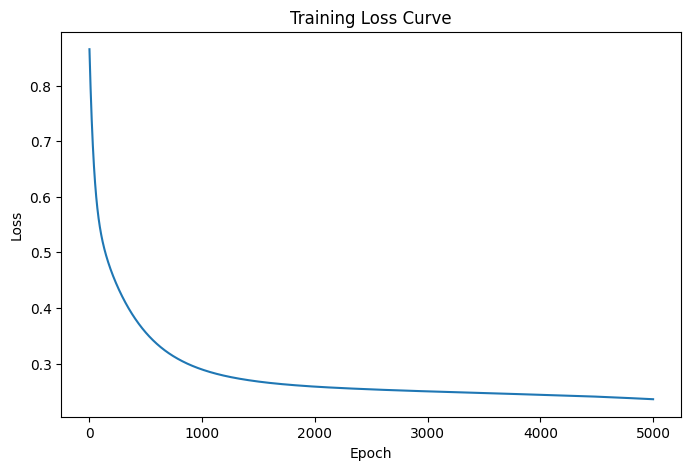

In [4]:
# 5. Plot Loss Curve

plt.figure(figsize=(8,5))
plt.plot(model.loss_history)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [5]:
# Accuracy
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.92

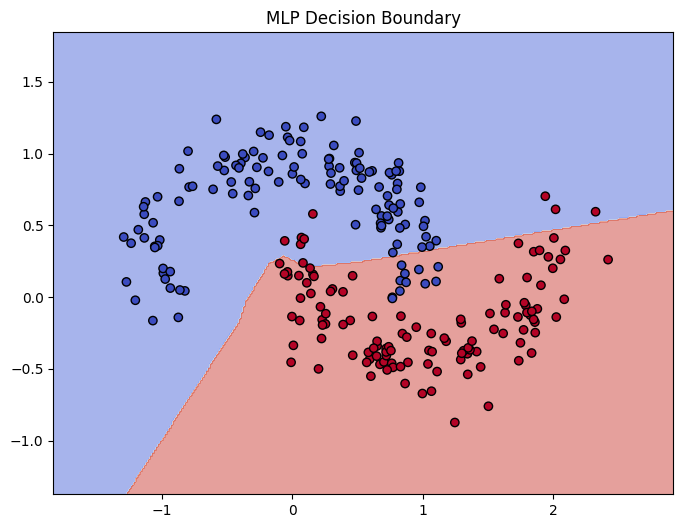

In [6]:
# 6. Decision Boundary Visualization
# Grid:
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 300),
    np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 300)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap="coolwarm")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap="coolwarm", edgecolors='k')
plt.title("MLP Decision Boundary")
plt.show()

## Results and Discussion

The multilayer perceptron achieved a final **test accuracy of approximately 0.916**, indicating that the network is able to learn a highly effective nonlinear decision rule for the two-moons classification task. This behavior is expected: the dataset is not linearly separable, and a single-layer perceptron cannot form curved decision boundaries, whereas an MLP with at least one hidden layer can approximate nonlinear functions.

### Training Behavior

The loss curve decreases smoothly and consistently throughout training. The initial loss of **1.20** reflects significant uncertainty in the untrained model. As gradient descent progresses, the loss drops rapidly within the first few hundred epochs and then gradually plateaus.

This steady downward trend indicates stable learning with no evidence of divergence or oscillation. The diminishing change in loss over time shows that the network is converging toward a local minimum.

### Decision Boundary Interpretation

The decision boundary plot shows a clear nonlinear separation between the two classes. The MLP successfully bends the boundary to trace the curved structure of the dataset. Although slight misclassifications appear near the boundary region, the overall shape closely follows the underlying data distribution.

### Conclusion

Overall, the multilayer perceptron performs well on this nonlinear classification problem. The model converges steadily, achieves high accuracy, and produces a decision boundary that adapts to the geometry of the data. This demonstrates the central advantage of neural networks: their ability to learn nonlinear relationships that linear methods cannot capture.